True

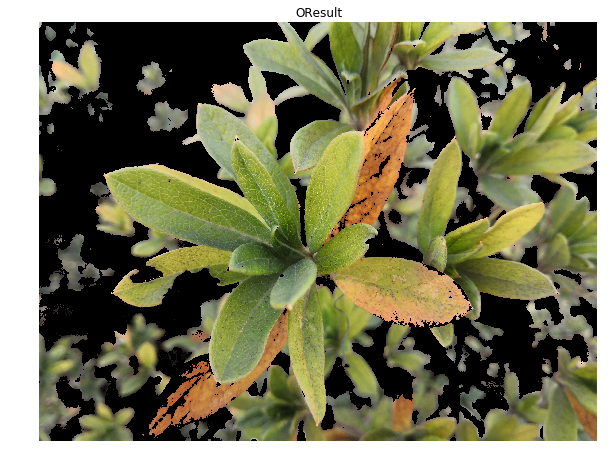

In [38]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


img = cv2.imread("dujuan_1.jpg")
#Convert to HSV space
HSV_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
hue = HSV_img[:, :, 0]


lower_gray = np.array([11, 0,0])
upper_gray = np.array([77,255,255])


mask = cv2.inRange(HSV_img, lower_gray, upper_gray)
# Bitwise-AND mask and original image
res2 = cv2.bitwise_and(img,img, mask= mask)


#cv2.namedWindow("zolo", 0)

#cv2.resizeWindow("zolo", 600, 600)

#cv2.imshow("zolo", res2)#显示第一幅图

#cv2.imwrite("green.jpg",res2)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(cv2.cvtColor(res2,cv2.COLOR_BGR2RGB))
plt.title('OResult'),plt.axis('off')

cv2.imwrite("res2.jpg",res2)


True

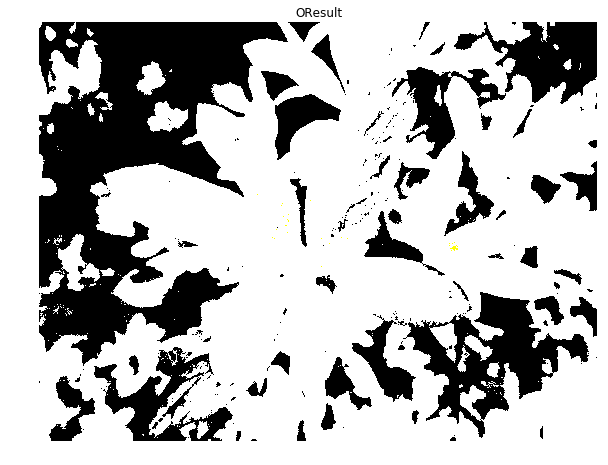

In [25]:
ret1, thresh1 = cv2.threshold(res2,0, 255, cv2.THRESH_BINARY)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(cv2.cvtColor(thresh1,cv2.COLOR_BGR2RGB))
plt.title('OResult'),plt.axis('off')

cv2.imwrite("aaa.jpg",thresh1)

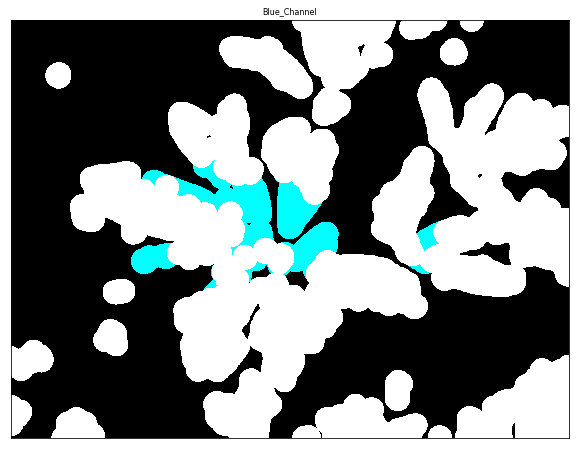

In [39]:
img=thresh1

kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (200, 200))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_1)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(opening)
plt.title(titles[i], fontsize=8)
plt.xticks([]), plt.yticks([])
plt.show()

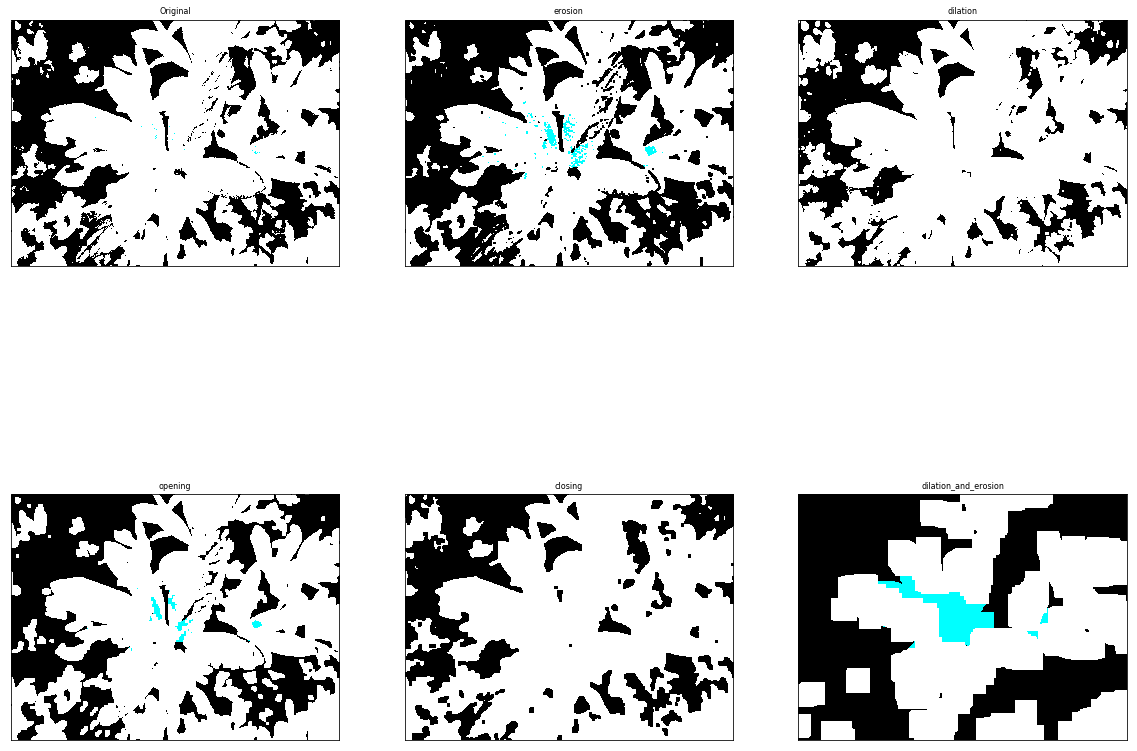

In [31]:
img = thresh1


kernel = np.ones((20, 20), np.uint8)    # 矩形结构

kernel_2 = np.ones((200, 200), np.uint8)

kernel_3 = np.ones((300, 300), np.uint8)

erosion = cv2.erode(img, kernel)   # 腐蚀
dilation = cv2.dilate(img, kernel) # 膨胀


erosion_2 = cv2.erode(img, kernel_2) 

dilation_and_erosion =cv2.dilate(erosion_2, kernel_3)

kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (40, 40))
opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel_1)

closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel_1)

titles = ['Original', 'erosion', 'dilation','opening','closing','dilation_and_erosion']
images = [img, erosion, dilation, opening, closing,dilation_and_erosion]

plt.rcParams['figure.figsize'] = (20.0, 16.0)
# 使用Matplotlib显示
# 一行三列图
for i in range(6):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i])
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

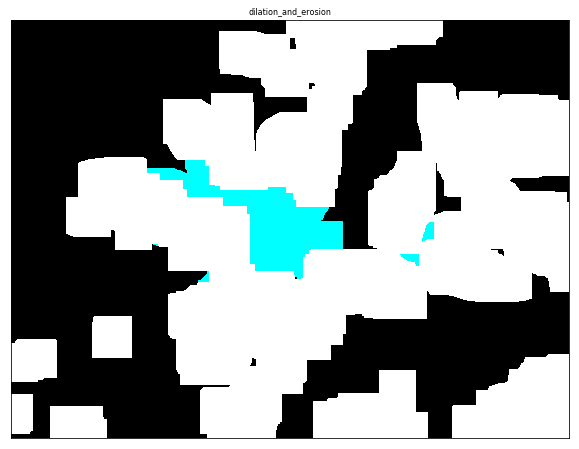

True

In [33]:
img = thresh1

kernel_2 = np.ones((200, 200), np.uint8)

kernel_3 = np.ones((300, 300), np.uint8)

erosion_2 = cv2.erode(img, kernel_2) 

dilation_and_erosion =cv2.dilate(erosion_2, kernel_3)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(dilation_and_erosion)
plt.title(titles[i], fontsize=8)
plt.xticks([]), plt.yticks([])
plt.show()

cv2.imwrite("dilation_and_erosion.jpg",dilation_and_erosion)

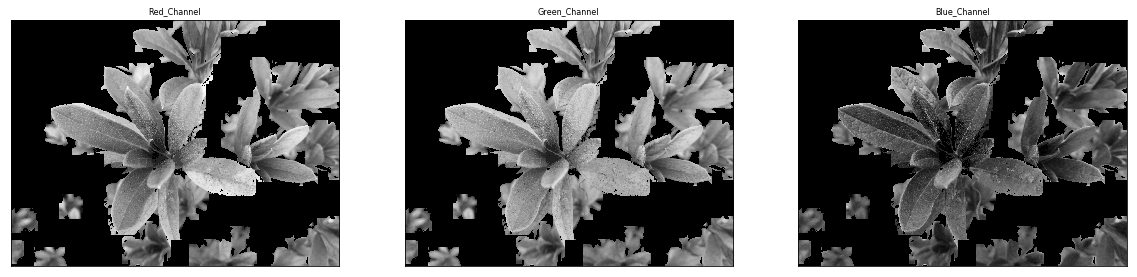

In [35]:
#(五)分离颜色通道&多通道图像混合
import cv2
'''
cv2.split(m, mv):将一个多通道数组分离成几个单通道数组
m：我们需要进行分离的多通道数组
mv：函数的输出数组或者输出的vector容器
'''
import  argparse
import numpy as np

(B,G,R) = cv2.split(res2)#之前得到的图

mask=cv2.cvtColor(dilation_and_erosion,cv2.COLOR_BGR2GRAY)

and_img_B = cv2.bitwise_and(B,mask)
and_img_G = cv2.bitwise_and(G,mask)
and_img_R = cv2.bitwise_and(R,mask)

titles = ['Red_Channel', 'Green_Channel', 'Blue_Channel']
images = [and_img_R, and_img_G, and_img_B]

plt.rcParams['figure.figsize'] = (20.0, 16.0)

# 使用Matplotlib显示
# 一行三列图
for i in range(3):
    plt.subplot(2, 3, i + 1)
    plt.imshow(images[i],cmap='gray')
    plt.title(titles[i], fontsize=8)
    plt.xticks([]), plt.yticks([])
plt.show()

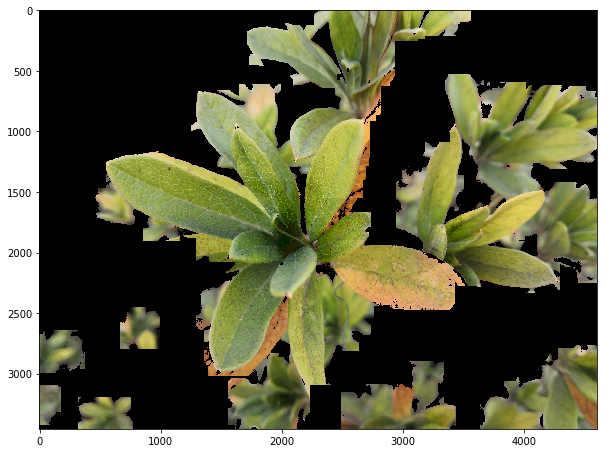

In [37]:
zeros = np.zeros(res2.shape[:2], np.uint8)

img_RGB = cv2.merge([and_img_R,and_img_G,and_img_B])

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(img_RGB)
#plt.imshow(cv2.cvtColor(img_RGB, cv2.COLOR_BGR2RGB))

### 上面的图已经大成功了其实。

**我们再调一下参数**

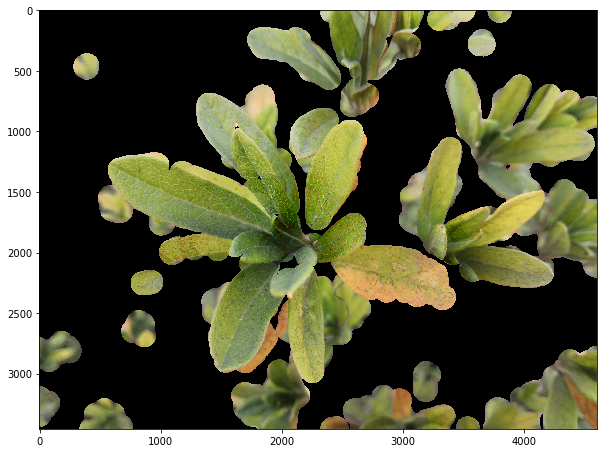

In [40]:
mask=cv2.cvtColor(opening,cv2.COLOR_BGR2GRAY)

and_img_B = cv2.bitwise_and(B,mask)
and_img_G = cv2.bitwise_and(G,mask)
and_img_R = cv2.bitwise_and(R,mask)

zeros = np.zeros(res2.shape[:2], np.uint8)

img_RGB = cv2.merge([and_img_R,and_img_G,and_img_B])

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(img_RGB)
#plt.imshow(cv2.cvtColor(img_RGB, cv2.COLOR_BGR2RGB))

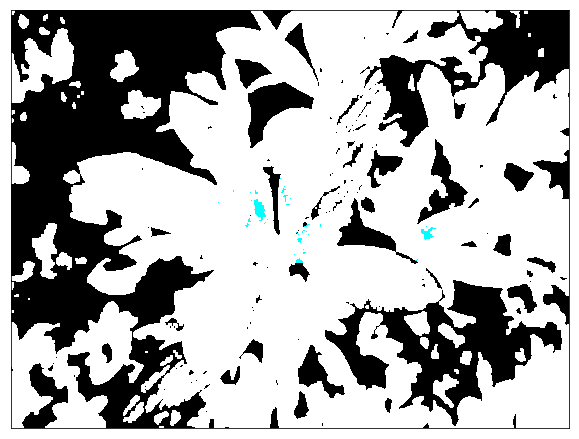

In [49]:
img=thresh1

opening=[img,0,0,0,0,0,0,0,0,0,0]
kernel_1 = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 20))
j=0
for i in range(10):
    j=i+1
    opening[j] = cv2.morphologyEx(opening[i], cv2.MORPH_OPEN, kernel_1)

plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.imshow(opening[9])
plt.xticks([]), plt.yticks([])
plt.show()

### 本来想试一个循环，结果发现白费功夫。每一次都一样。